In [1]:
import sys
sys.path.append('../')
import numpy as np
from clfanalysis.predict import run_classifier_predictions

# Data

In [2]:
DataParams = {}


clf_flag = 'mlp' 
datafile_p = '115434' 

DataParams['N'] = 6
DataParams['prefix']  = '../expt_data/Claire_ramseydata/'
DataParams['year']  = '2018'
DataParams['date']  = '20181010'
DataParams['brightID']  = '115321'
DataParams['darkID']  = '115302'
DataParams['img_shape']  = (11, 38)
DataParams['cycles']  = 500 
DataParams['save'] = '_ramsey'

binary_data = []
rho_0_data = []
rho_1_data =[]
pi_data = []

# Classification Analysis

In [3]:
for ionpos in range(DataParams['N']):
    
    print()
    print('Ion number', ionpos + 1)
    
    pred, wpred, rho0, rho1, pi = run_classifier_predictions(ionpos, clf_flag, datafile_p, **DataParams)
    
    binary_data.append(pred)
    rho_0_data += rho0
    rho_1_data += rho1
    pi_data += pi
    
    np.savez(clf_flag+'_fulldata'+DataParams['save'],
             DataParams=DataParams, 
             binary_data=binary_data, 
             rho_0_data=rho_0_data,
             rho_1_data=rho_1_data,
             pi_data=pi_data)
    
    


Ion number 1
Making a prediction 2 bare 0.96 0.0
Making a prediction 3 bare 1.0 0.96

Ion number 2
Making a prediction 0 bare 0.97 0.0


../clfanalysis/noisecorrections.py:20: RuntimeWarning: invalid value encountered in double_scalars
  alpha_hat = (nu_min * (nu_max - pi_base)) / (pi_base*(nu_max - nu_min))
../clfanalysis/noisecorrections.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  beta_hat = ((1 - nu_max)*(pi_base - nu_min)) / ((1 - pi_base)*(nu_max - nu_min))
../clfanalysis/noisecorrections.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  pi = (pi_base - nu_min) / (nu_max - nu_min)
../clfanalysis/noisecorrections.py:25: RuntimeWarning: invalid value encountered in double_scalars
  rho_plus = (beta_hat * (1.0 - pi_base)) / (pi)



Ion number 3
Making a prediction 0 bare 0.89 0.0


../clfanalysis/noisecorrections.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_hat = (nu_min * (nu_max - pi_base)) / (pi_base*(nu_max - nu_min))
../clfanalysis/noisecorrections.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  beta_hat = ((1 - nu_max)*(pi_base - nu_min)) / ((1 - pi_base)*(nu_max - nu_min))
../clfanalysis/noisecorrections.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  pi = (pi_base - nu_min) / (nu_max - nu_min)
../clfanalysis/noisecorrections.py:24: RuntimeWarning: invalid value encountered in double_scalars
  rho_minus = (alpha_hat * pi_base) / (1.0 - pi)
../clfanalysis/noisecorrections.py:25: RuntimeWarning: invalid value encountered in double_scalars
  rho_plus = (beta_hat * (1.0 - pi_base)) / (pi)


Making a prediction 4 bare 0.95 0.89
Making a prediction 7 bare 0.96 0.95

Ion number 4
Making a prediction 0 bare 0.95 0.0
Making a prediction 1 bare 0.97 0.95


../clfanalysis/noisecorrections.py:20: RuntimeWarning: invalid value encountered in double_scalars
  alpha_hat = (nu_min * (nu_max - pi_base)) / (pi_base*(nu_max - nu_min))
../clfanalysis/noisecorrections.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  beta_hat = ((1 - nu_max)*(pi_base - nu_min)) / ((1 - pi_base)*(nu_max - nu_min))
../clfanalysis/noisecorrections.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  pi = (pi_base - nu_min) / (nu_max - nu_min)
../clfanalysis/noisecorrections.py:25: RuntimeWarning: invalid value encountered in double_scalars
  rho_plus = (beta_hat * (1.0 - pi_base)) / (pi)



Ion number 5
Making a prediction 3 bare 0.95 0.0
Making a prediction 9 bare 0.98 0.95

Ion number 6
Making a prediction 0 bare 0.94 0.0


../clfanalysis/noisecorrections.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_hat = (nu_min * (nu_max - pi_base)) / (pi_base*(nu_max - nu_min))
../clfanalysis/noisecorrections.py:21: RuntimeWarning: invalid value encountered in double_scalars
  beta_hat = ((1 - nu_max)*(pi_base - nu_min)) / ((1 - pi_base)*(nu_max - nu_min))
../clfanalysis/noisecorrections.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  pi = (pi_base - nu_min) / (nu_max - nu_min)
../clfanalysis/noisecorrections.py:24: RuntimeWarning: invalid value encountered in double_scalars
  rho_minus = (alpha_hat * pi_base) / (1.0 - pi)


0.08106680313532894 0.010612881514697572 0.45665310665483466


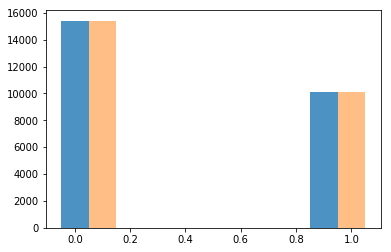

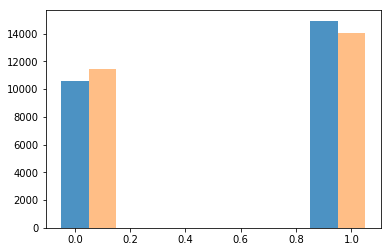

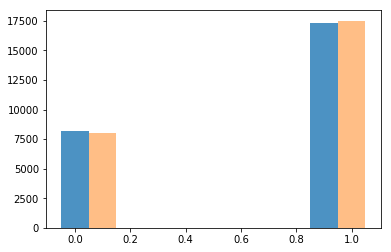

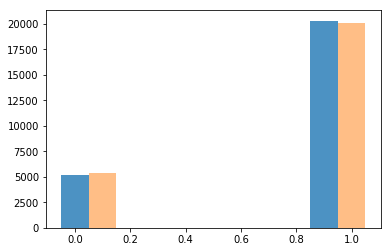

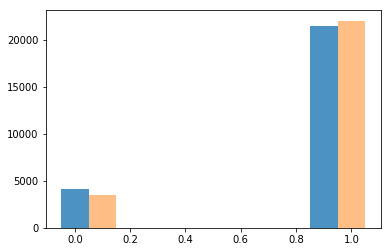

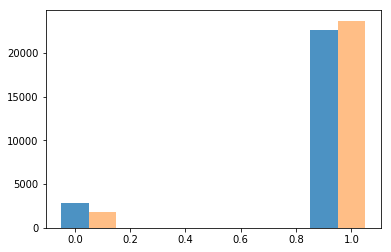

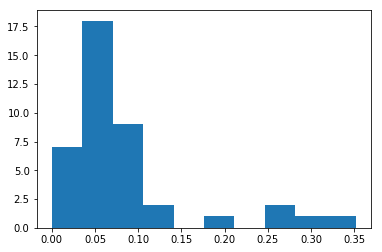

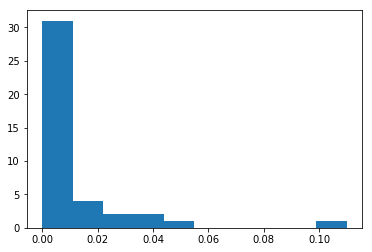

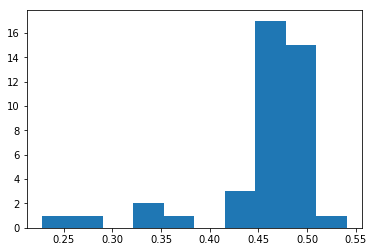

In [21]:
print(np.mean(np.asarray(rho_0_data)), np.mean(np.asarray(rho_1_data)),np.mean(np.asarray(pi_data)))


import matplotlib.pyplot as plt
clairesdata = np.load('../expt_data/Claire_ramseydata/20181010-115434ion_bright_matrix.npz')['labels_bright']
claire_matrix = clairesdata.reshape(6, 51*500)

for idx in range(6):
    plt.figure()
    plt.hist(binary_data[idx] - 0.05, alpha=0.8)
    plt.hist(claire_matrix[idx] +0.05  , alpha=0.5)
    plt.show()

plt.figure()
plt.hist(np.asarray(rho_0_data))
plt.show()

plt.figure()
plt.hist(np.asarray(rho_1_data))
plt.show()

plt.figure()
plt.hist(np.asarray(pi_data))
plt.show()